In [1]:
import numpy as np
from data_utils import *

Using TensorFlow backend.


In [2]:
IMG_HEIGHT = 384
IMG_WIDTH = 256
BATCH_SIZE = 8

x_train = np.load('dataset/x_train.npy').astype(np.float32)
x_test = np.load('dataset/x_test.npy').astype(np.float32)
y_train = np.load('dataset/y_train_onehot.npy').astype(np.float32)
y_test = np.load('dataset/y_test_onehot.npy').astype(np.float32)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(900, 384, 256, 3) (900, 384, 256, 4)
(100, 384, 256, 3) (100, 384, 256, 4)


In [3]:
from models.FCN import *

In [4]:
model = FCN8s(img_shape = x_train[0].shape, num_of_class = 4,learning_rate = 1e-3)

In [5]:
model.show_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 384, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 384, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 384, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 192, 128, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [6]:
for layer in model.model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
conv6 True
conv7 True
conv8 True
skip_pool4 True
skip_pool5 True
add_1 True
skip_pool3 True
skip_sum1 True
add_2 True
skip_sum2 True
conv2d_1 True
activation_1 True


In [7]:
history = model.train_generator(x_train, y_train, 
                                x_test, y_test, 
                                'FCN_model',
                                epoch = 50,
                                batch_size = BATCH_SIZE)

Epoch 1/50
113/113 [==============================] - 62s 549ms/step - loss: 0.5436 - acc: 0.7346 - val_loss: 0.3780 - val_acc: 0.8052

Epoch 00001: val_acc improved from -inf to 0.80521, saving model to ./save_model/FCN_model.h5
Epoch 2/50
113/113 [==============================] - 45s 399ms/step - loss: 0.2911 - acc: 0.8830 - val_loss: 0.2451 - val_acc: 0.9073

Epoch 00002: val_acc improved from 0.80521 to 0.90726, saving model to ./save_model/FCN_model.h5
Epoch 3/50
113/113 [==============================] - 45s 395ms/step - loss: 0.2163 - acc: 0.9172 - val_loss: 0.2151 - val_acc: 0.9188

Epoch 00003: val_acc improved from 0.90726 to 0.91881, saving model to ./save_model/FCN_model.h5
Epoch 4/50
113/113 [==============================] - 48s 424ms/step - loss: 0.1938 - acc: 0.9239 - val_loss: 0.2036 - val_acc: 0.9221

Epoch 00004: val_acc improved from 0.91881 to 0.92207, saving model to ./save_model/FCN_model.h5
Epoch 5/50
113/113 [==============================] - 44s 387ms/step - 

Epoch 37/50
113/113 [==============================] - 46s 410ms/step - loss: 0.0698 - acc: 0.9735 - val_loss: 0.1484 - val_acc: 0.9537

Epoch 00037: val_acc did not improve from 0.95445
Epoch 38/50
113/113 [==============================] - 48s 423ms/step - loss: 0.0695 - acc: 0.9737 - val_loss: 0.1506 - val_acc: 0.9548

Epoch 00038: val_acc improved from 0.95445 to 0.95483, saving model to ./save_model/FCN_model.h5
Epoch 39/50
113/113 [==============================] - 49s 434ms/step - loss: 0.0696 - acc: 0.9736 - val_loss: 0.1532 - val_acc: 0.9528

Epoch 00039: val_acc did not improve from 0.95483
Epoch 40/50
113/113 [==============================] - 49s 435ms/step - loss: 0.0691 - acc: 0.9737 - val_loss: 0.1478 - val_acc: 0.9534

Epoch 00040: val_acc did not improve from 0.95483
Epoch 41/50
113/113 [==============================] - 49s 433ms/step - loss: 0.0670 - acc: 0.9746 - val_loss: 0.1507 - val_acc: 0.9549

Epoch 00041: val_acc improved from 0.95483 to 0.95485, saving model 

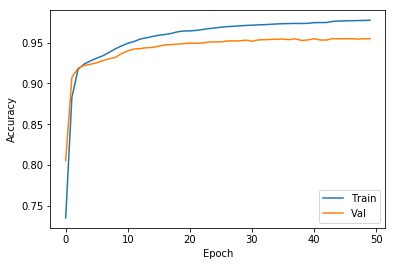

In [8]:
plot_acc(history)

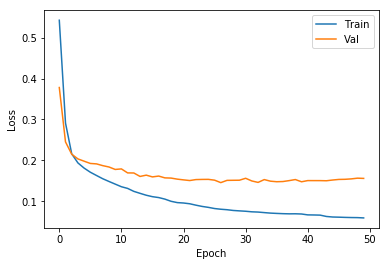

In [9]:
plot_loss(history)